## 1. input data



In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

In [0]:
x1  = data[:, 0]
x2  = data[:, 1]
label   = data[:, 2]

x1_label0 = x1[label == 0]
x2_label0 = x2[label == 0]

x1_label1 = x1[label == 1]
x2_label1 = x2[label == 1]

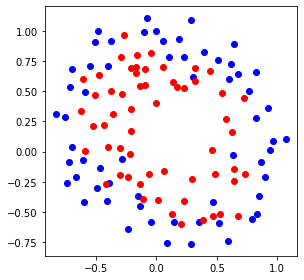

In [3]:
# data plotting
plt.figure()
plt.scatter(x1_label0, x2_label0, c='b')
plt.scatter(x1_label1, x2_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [0]:
data = np.array([x1,x2,label])

In [0]:
X = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[-1:]))
m = y.size

In [0]:
# X에는 1을 가지는 열을 삽입한다(interception계산을 위해)
X = np.insert(X,0,1,axis=1)

## 2. g(x,y; $\theta$) 를 작성한다. 
- degree = 4로 두면 총 15개의 term이 생긴다
- 혹은 threshold 조정하는 방법 : classifier의 threshold를 조정하는 것 
- polynomial 형태의 z를 만들어 주는 것이 중요함. 
- g(x,y;$\theta$) = $\theta_0 + \theta_1 x_1+\theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1 x_2 + \theta_6 x_1^3 + \theta_7 x_2^3 + \theta_8 x_1^2 x_2 + \theta_9 x_1 x_2^2 + \theta_7 x_1^4 + \theta_8 x_2^4 + \theta_9 x_1^3 x_2 + \theta_10 x_1^3 x_2^2 + \theta_11 x_1^3 x_2^3 + \theta_12 x_1 x_2^3 + \theta_13 x_1^2 x_2^3 + \theta_14 x_1^2 x_1^2$

In [0]:
# 여기서는 z값이 단순히 theta.T*X값으로 정의되지는 않는다. 
# 최대 16차원의 non-linear boundary를 위한 식을 정의해야 한다. 
#식을 정의하는 방법?
def NewFeatureMake( x1col, x2col ):
    # 차수 정의 
    degrees = 4
    # X의 첫 열은 1로 이루어진 열 for intercept 
    out = np.ones( (x1col.shape[0], 1) )

    # 각 차수별로 가능한 모든 수식을 작성하기 위한 이중 for문 
    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [0]:
new_X = NewFeatureMake(X[:,1],X[:,2])

In [87]:
new_X.shape

(118, 15)

In [9]:
X_len = new_X.shape[1]
X_len #15가 나와야 한다. , 확인 

15

In [0]:
#X벡터값과 theta값을 받았을 때 도출할 수 있는 logistic model
def h(theta, X):
  z = np.dot(X,theta)
  return 1./(np.exp(-z)+1)

In [0]:
#Objective function
def ObjectiveFunc(theta, X, y,m):
  for_0 = np.dot(-np.array(y).T,np.log(h(theta,X)))
  for_1 = np.dot((1-np.array(y)).T,np.log(1-h(theta,X)))
  return float( (1./m) * ( np.sum(for_0 - for_1)  ) )

In [0]:
# Gradient descent using ObjectiveFunc
iteration = 300000 # hyperparameter
alpha = 0.0069

def GradientDescent(X,y,theta,m):
    #plotting위해 저장하는 history
    J_history = [] 
    theta_history = []

    #iteration
    for i in range(iteration):
        tmp = theta #동시에 update하기 위해선 교환하기 위한 새로운 변수가 필요
        
        #history값 저장 
        J_history.append(ObjectiveFunc(theta,X,y,m))
        theta_history.append(list(theta[:,0]))

        #update theta
        for j in range(len(tmp)):
            tmp[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmp 
    return theta, theta_history, J_history

In [0]:
#theta초깃값 
theta=np.zeros((new_X.shape[1],1))

In [0]:
# Gradient descent계산
theta, theta_history, J_history = GradientDescent(new_X,y, theta,m)

In [15]:
theta #확인 (총15개의 theta가 나온다. )

array([[ 3.86730586],
       [ 2.64160215],
       [ 4.3259162 ],
       [-6.27667274],
       [-5.45946857],
       [-6.43900228],
       [ 0.6617736 ],
       [-1.98972074],
       [-0.61986609],
       [-1.01855828],
       [-6.27031611],
       [ 1.35104111],
       [-2.70513966],
       [-2.62172525],
       [-4.46911386]])

## 3. train cost 

In [16]:
J_history[:10] #cost값 10개만 확인

[0.6931471805599454,
 0.6930865546438951,
 0.693026021410182,
 0.6929655805029302,
 0.6929052315678137,
 0.69284497425205,
 0.6927848082043929,
 0.6927247330751265,
 0.692664748516057,
 0.6926048541805089]

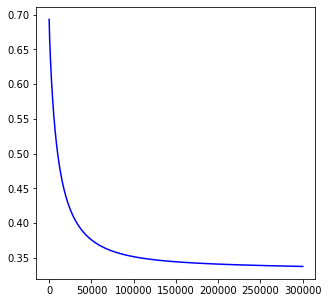

In [17]:
# cost값 plotting
plt.figure(figsize=(5, 5))
plt.plot(range(len(J_history)),J_history,'b')

In [18]:
J_history[-1] # 마지막 train cost값 

0.3377502545533913

## 4. train accuracy plotting

In [0]:
# accuracy 정의 
def accuracy(X, y, threshold=0.55):
  pred = (h(theta, new_X)>=threshold).astype(int) #예측한 값
  acc = np.mean(pred.flatten() == y.flatten()) # 실제값과 같은지를 비교하여 전체 len으로 나눔 
  return acc * 100

In [20]:
# hyperparameter 조정하기 
threshold=0.49
pred = (h(theta, new_X)>=threshold).astype(int) #예측한 값
np.mean(pred.flatten() == y.flatten()) # 실제값과 같은지를 비교하여 전체 len으로 나눔(하나하나의 값이 나오는지를 확인한다. -> 맞는수 / 전체 갯수 이므로 )

0.8389830508474576

In [21]:
accuracy = accuracy(new_X, label)
print(accuracy) #85%에 해당 

85.59322033898306


In [0]:
#h(theta, new_X) #예측값 0~1의 값

## 5. plot the optimal classifier
- converge 될 때의 optimal classifier을 그린다. g = 0값이 결국 coundary가 된다. 
- 원래 데이터 위에 classifier을 겹쳐서 그린다.
- python3의 contour 함수를 사용한다. 

In [0]:
# x좌표,y좌표에 해당하는 값은 0~1이다
x1_range = np.linspace(-2,2)
x2_range = np.linspace(-2,2)

In [82]:
# 생성한 새로운 차수를 담을 새로운 array 초기화 
z_range = np.zeros((len(x1_range), len(x2_range)))
z_range.shape

(50, 50)

In [0]:
# z값은 결국 g()=0에 해당하는 line을 그리고자 하는 형태이다. 
# 해당 x1,x2값에 대해 동일한 class를 가지는 값을 표현하면 된다. 
for i in range(len(x1_range)):
    for j in range(len(x2_range)):
        myfeaturesij = NewFeatureMake(np.array([x1_range[i]]),np.array([x2_range[j]]))
        z_range[i][j] = np.dot(theta.T,myfeaturesij.T)
z_range = z_range.transpose()

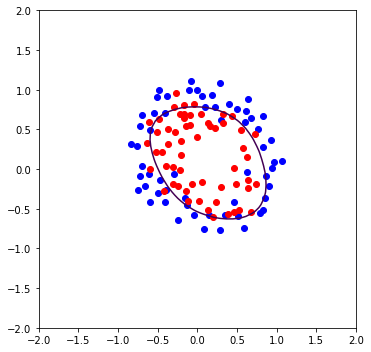

In [89]:
#boundary plotting
plt.figure(figsize=(8,5))
X1_range, X2_range = np.meshgrid(x1_range, x2_range)
#boundary_plotting = plt.contour(X1_range, X2_range, z_range.T)
#하나의 등고선만을 표현 
boundary_plotting = plt.contour(X1_range, X2_range, z_range.T,[0])
#data plotting
plt.scatter(x1_label0, x2_label0, c='b')
plt.scatter(x1_label1, x2_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()